In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from reportlab.pdfgen.canvas import Canvas
from reportlab.lib.units import inch
from reportlab.lib.units import mm
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.units import cm
from reportlab.lib.utils import ImageReader
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, inch
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from io import BytesIO
import scipy

In [2]:
# Файл отчета.
c = Canvas("Отчет_ДКК А500С за 2020 г. УГМК-Сталь.pdf")
pdfmetrics.registerFont(TTFont('NotoSans', 'Noto_Sans/NotoSans-Regular.ttf'))
c.setFont('NotoSans', 14)
xc=72
yc=1
c.drawString(xc, (29.7-yc)*cm, "Отчет_ДКК А500С за 2020 г. УГМК-Сталь")

In [3]:
# Загрузка исходных данных для работы .
data = pd.read_excel('Копия ДКК А500С за 2020 г. УГМК-Сталь.xlsx')

# Выбираем из таблицы индексы для фильтрации и назначаем тип категории.
data['Марка стали'] = data['Марка стали'].astype('category')
data['Профиль / размер'] = data['Профиль / размер'].astype('category')
steelgrade = data['Марка стали'].drop_duplicates().tolist()
data = data.set_index(['Марка стали', 'Профиль / размер'])

In [4]:
indent = 1.5
height = indent

['Ст3пс А500', 'Ст3Гпс А500', 'Ст3сп А500']

C:\Users\Sovon\AppData\Local\Temp\ipykernel_35688\1729253525.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = data.xs((steelgrade[i], steelsize[j]))
C:\Users\Sovon\AppData\Local\Temp\ipykernel_35688\1729253525.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = data.xs((steelgrade[i], steelsize[j]))
C:\Users\Sovon\AppData\Local\Temp\ipykernel_35688\1729253525.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = data.xs((steelgrade[i], steelsize[j]))
C:\Users\Sovon\AppData\Local\Temp\ipykernel_35688\1729253525.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = data.xs((steelgrade[i], steelsize[j]))
C:\Users\Sovon\AppData\Local\Temp\ipykernel_35688\1729253525.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = data.xs((steelgrade[i], steelsize[j]))
C:\Users\Sovon\AppData\Local\Temp\ipykernel_35688\1729253525.py:9: Performa

RuntimeError: class PDFDocument instances can only be saved once

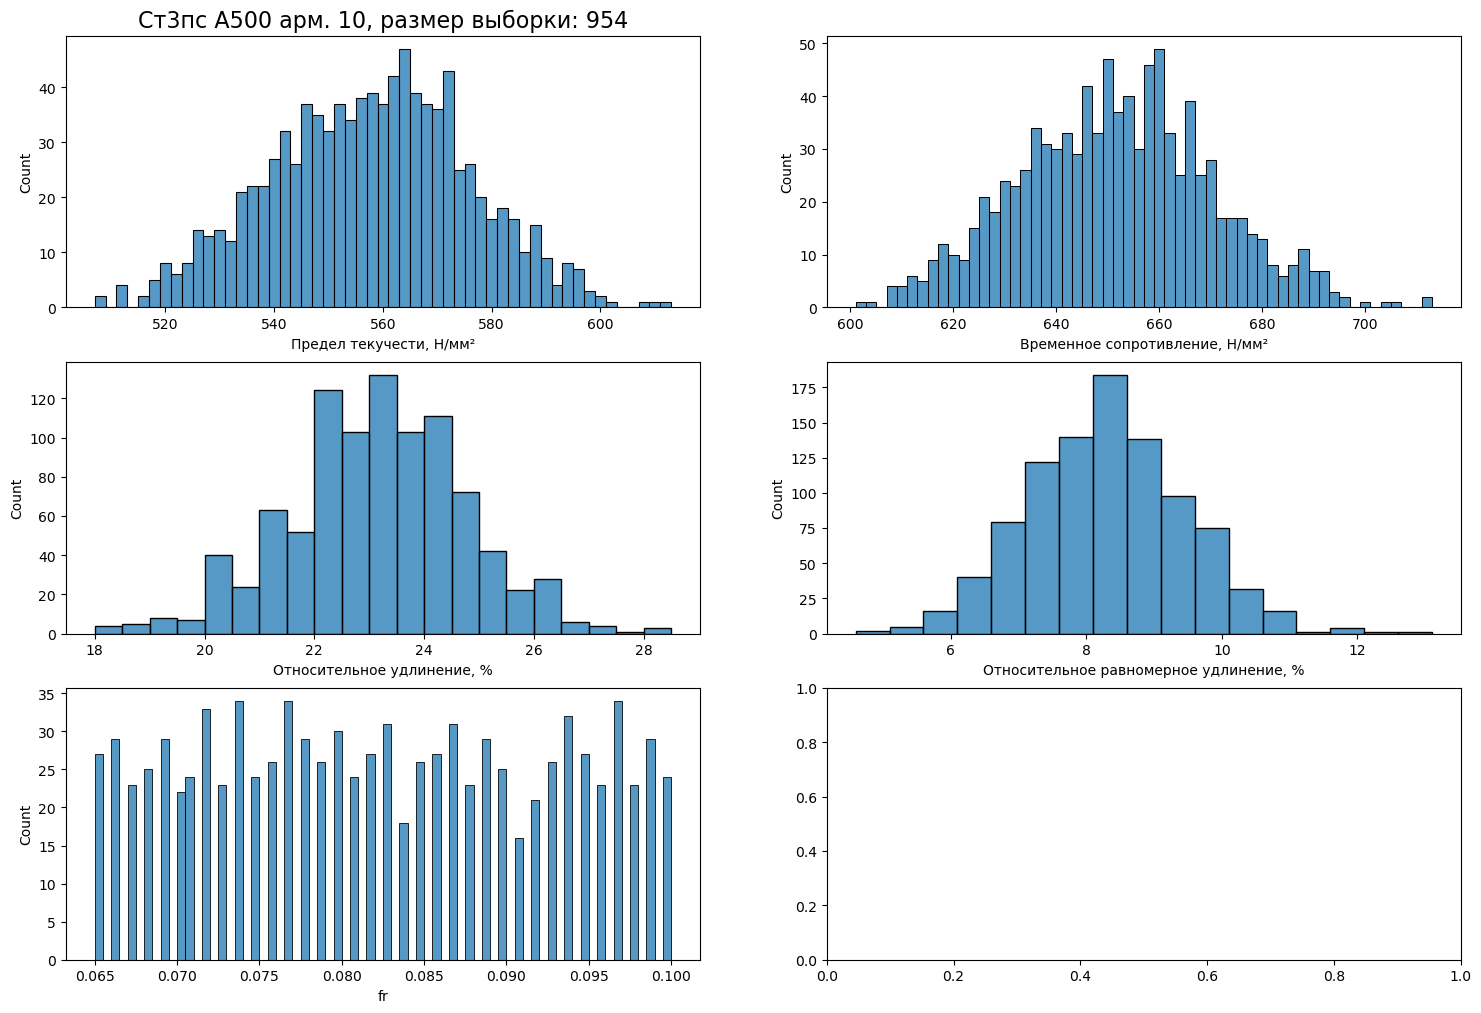

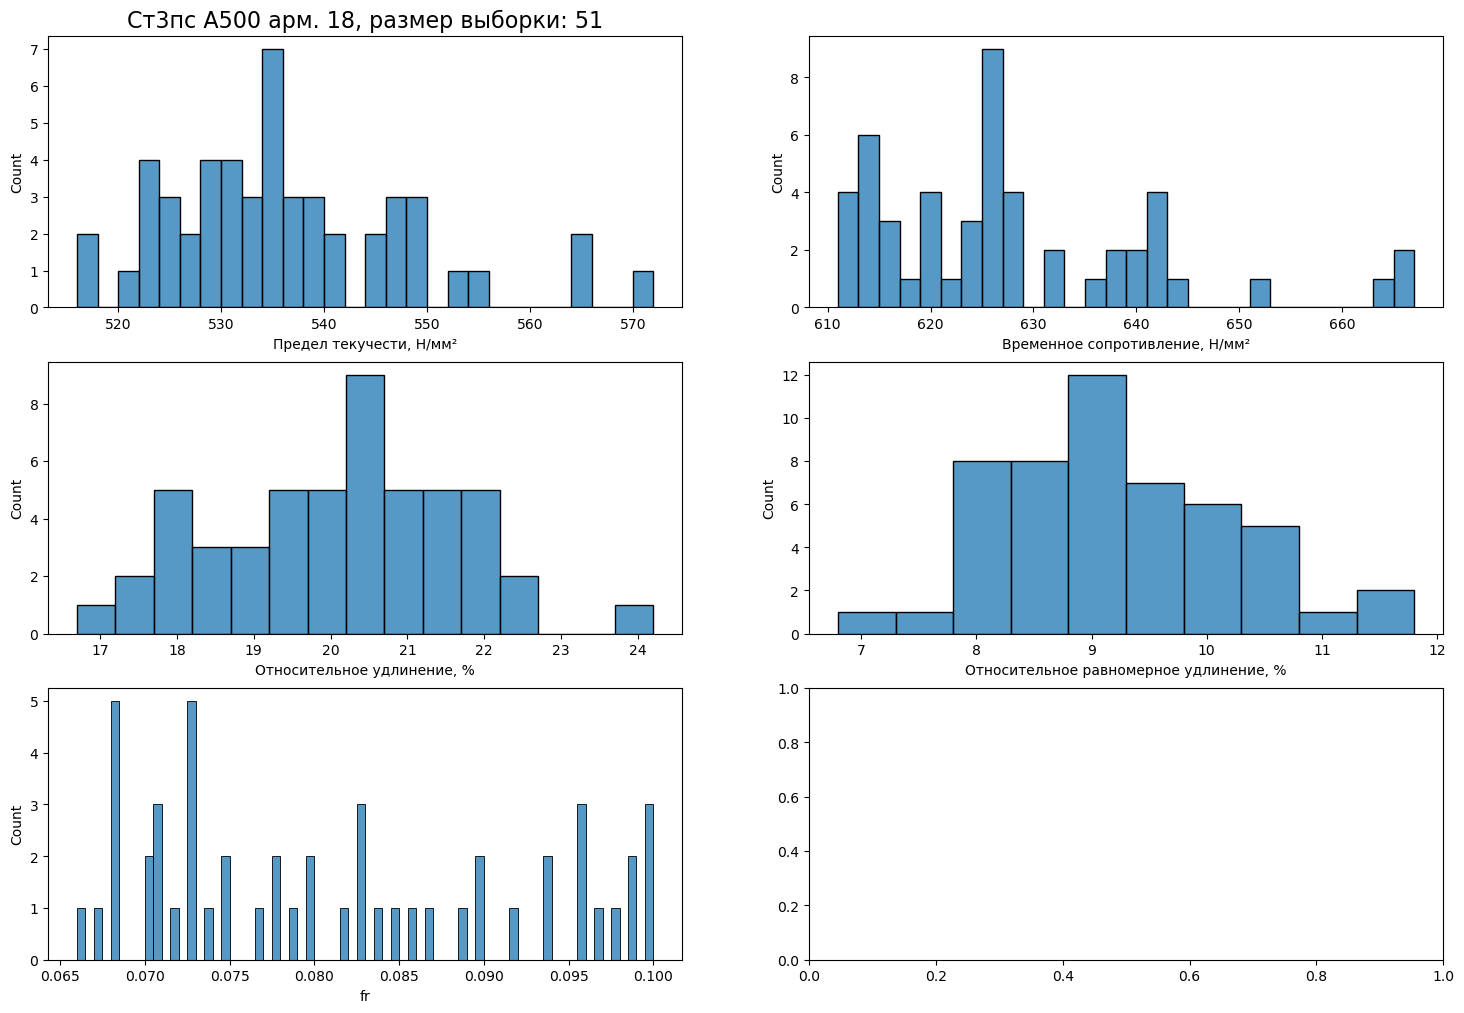

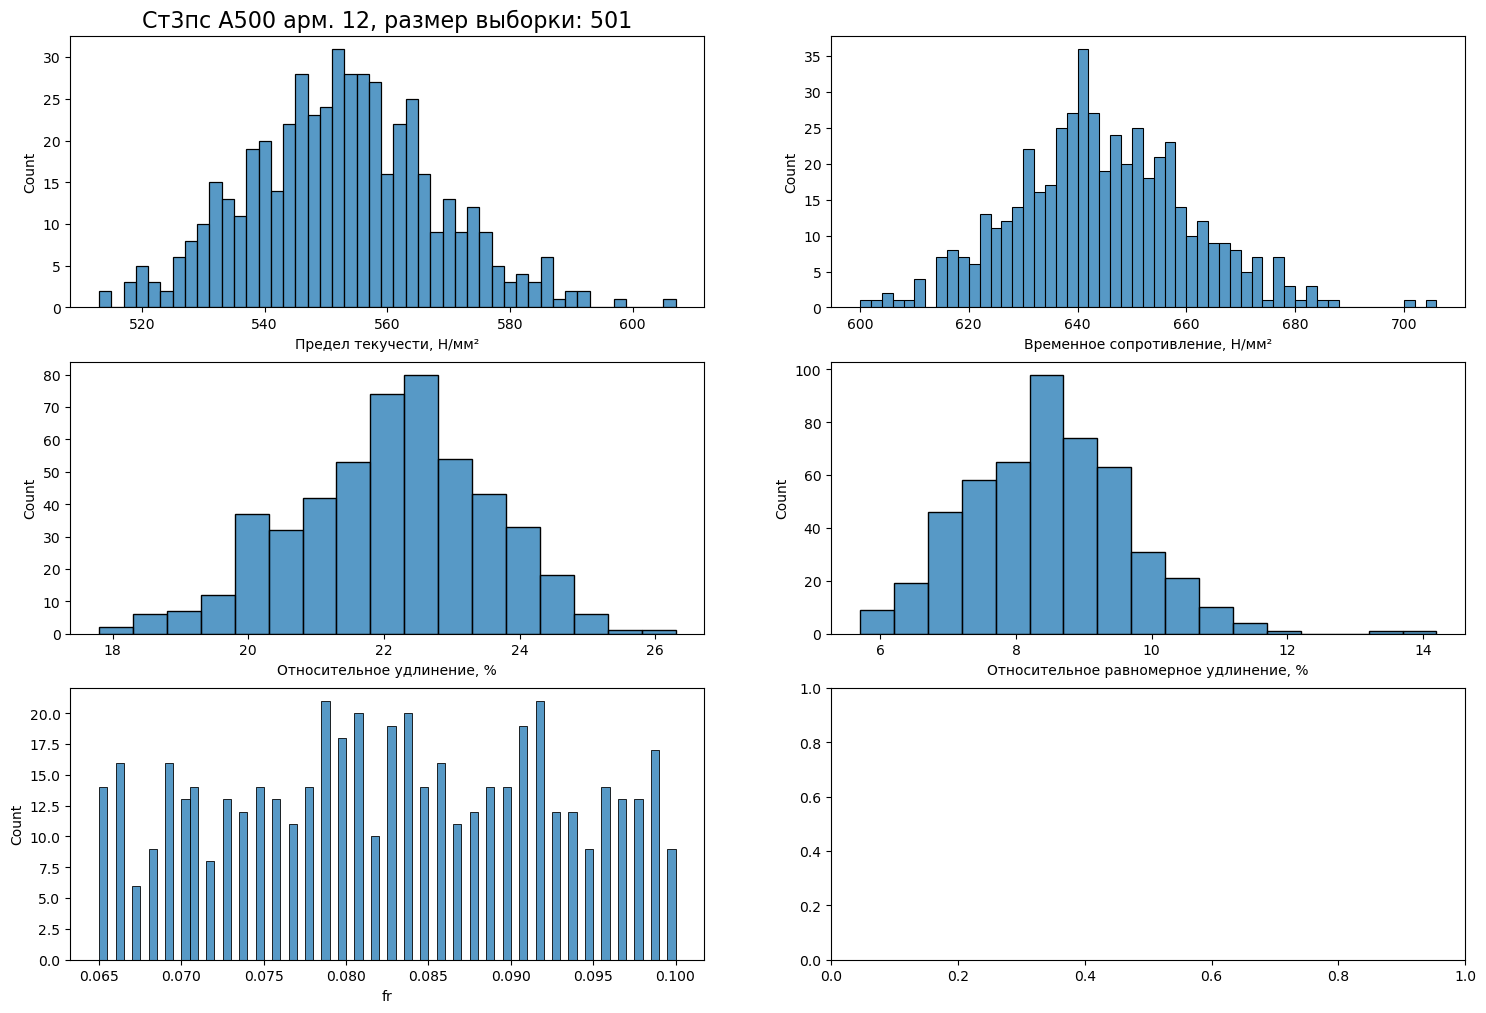

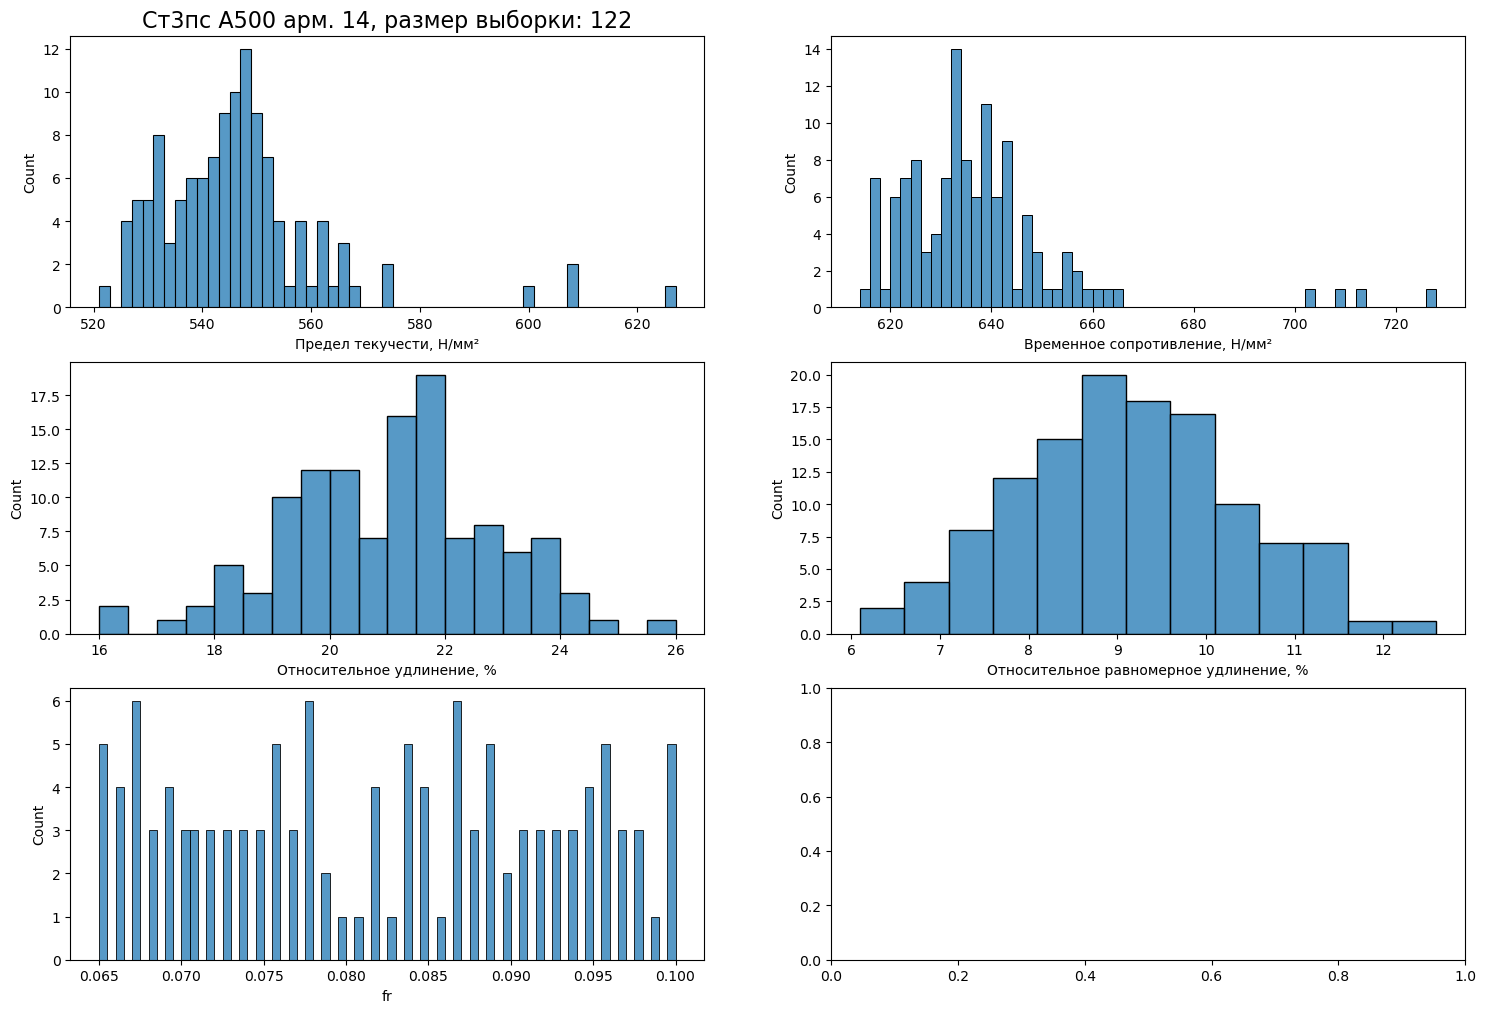

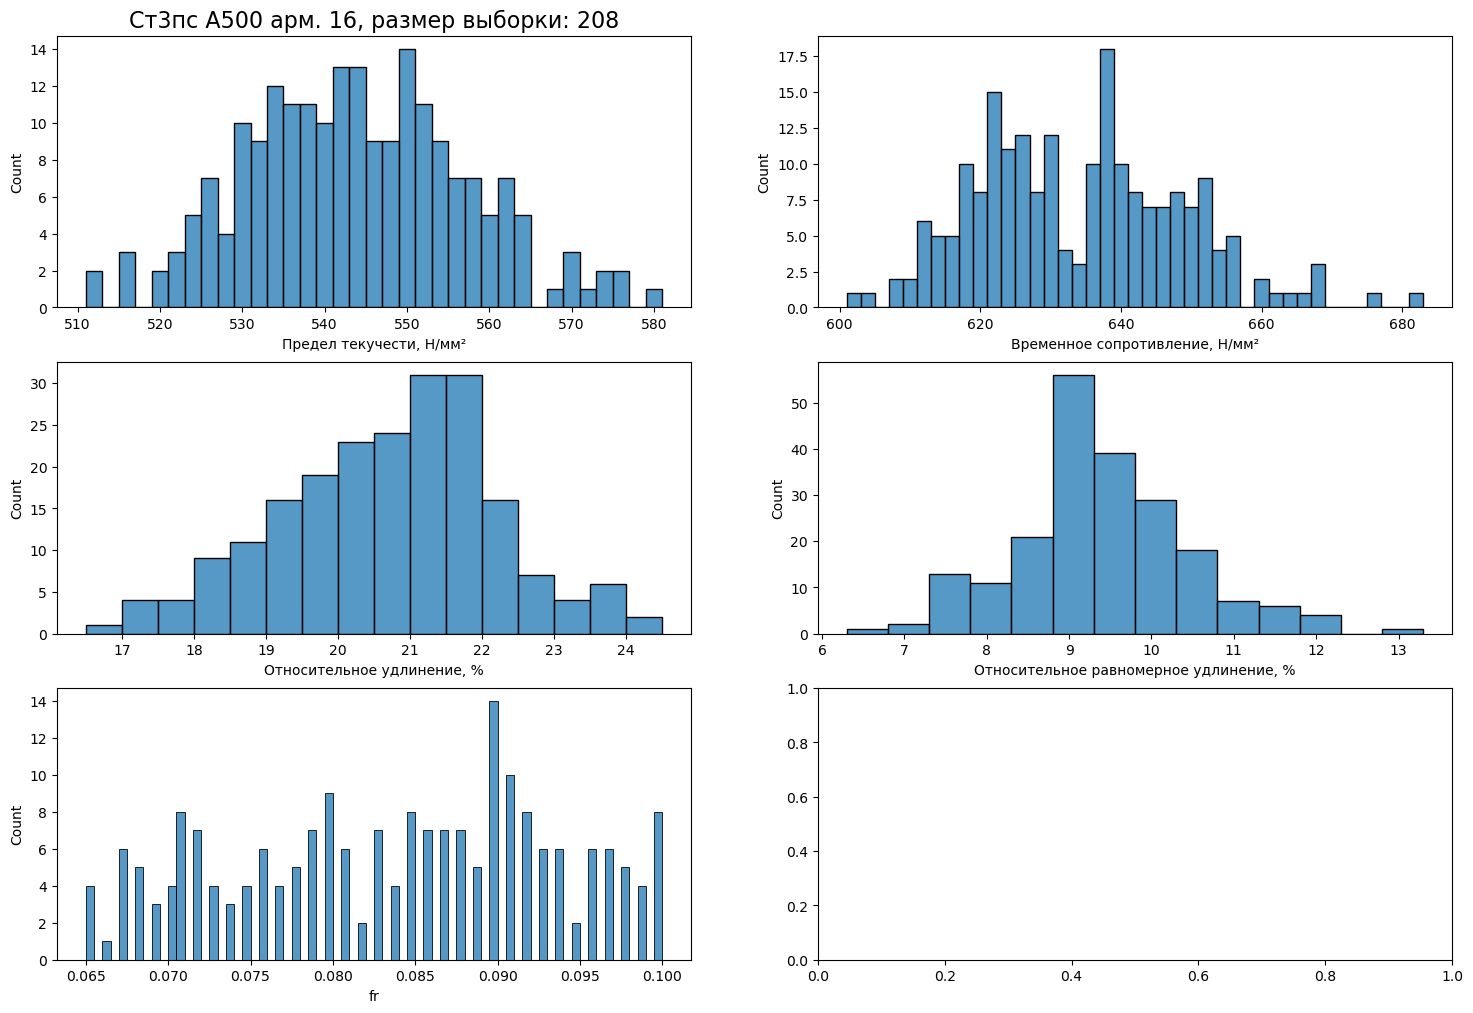

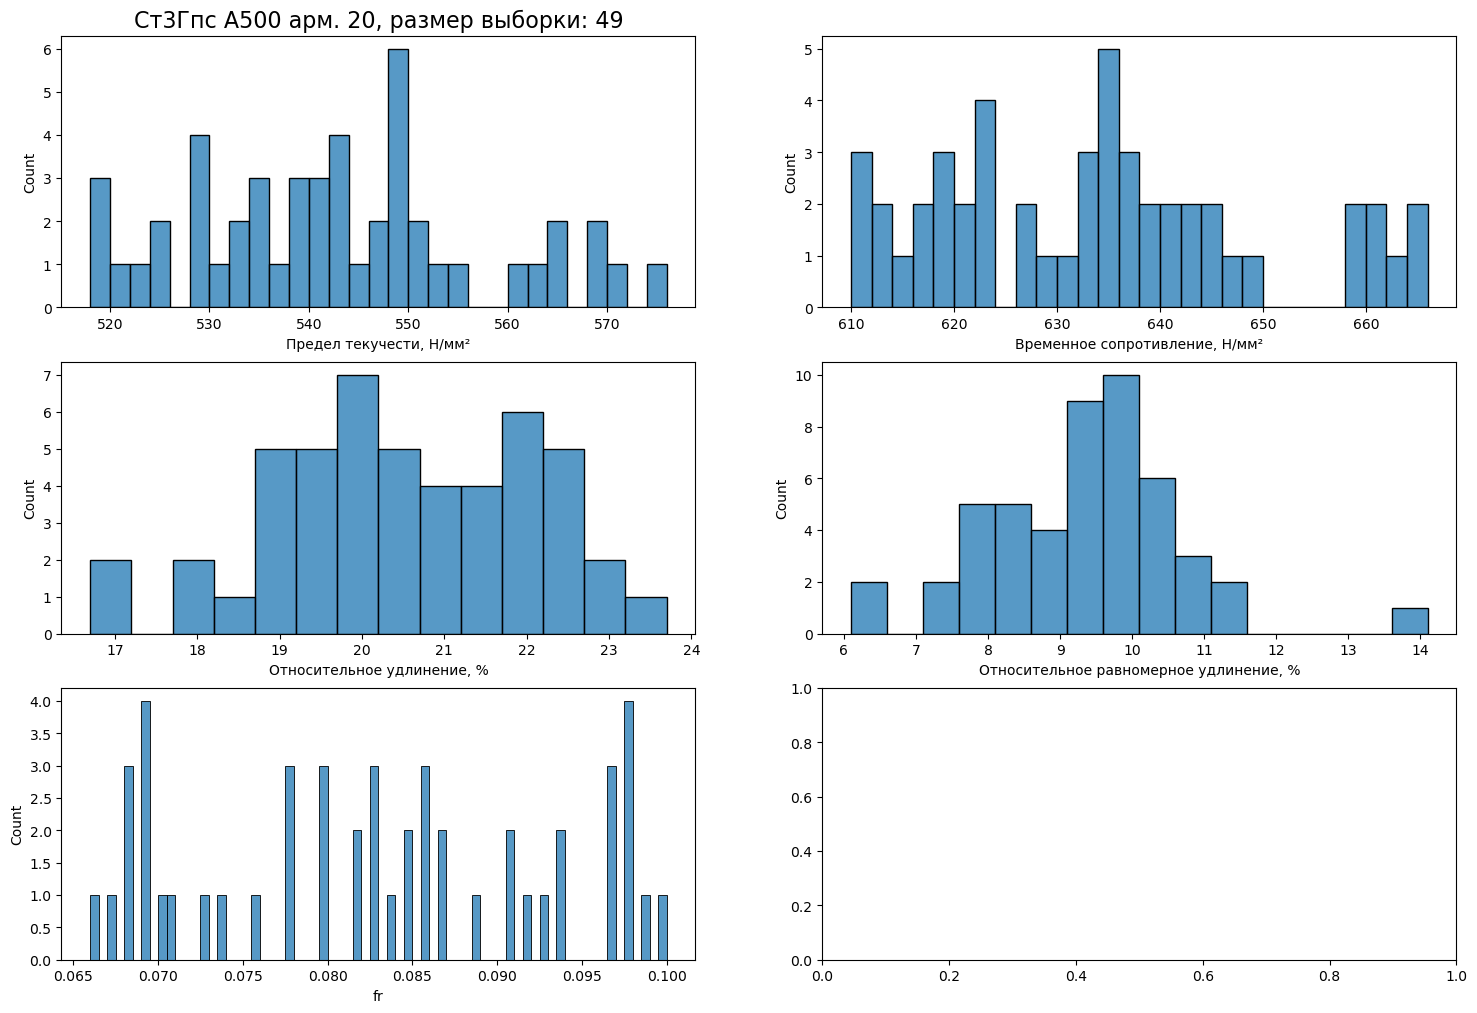

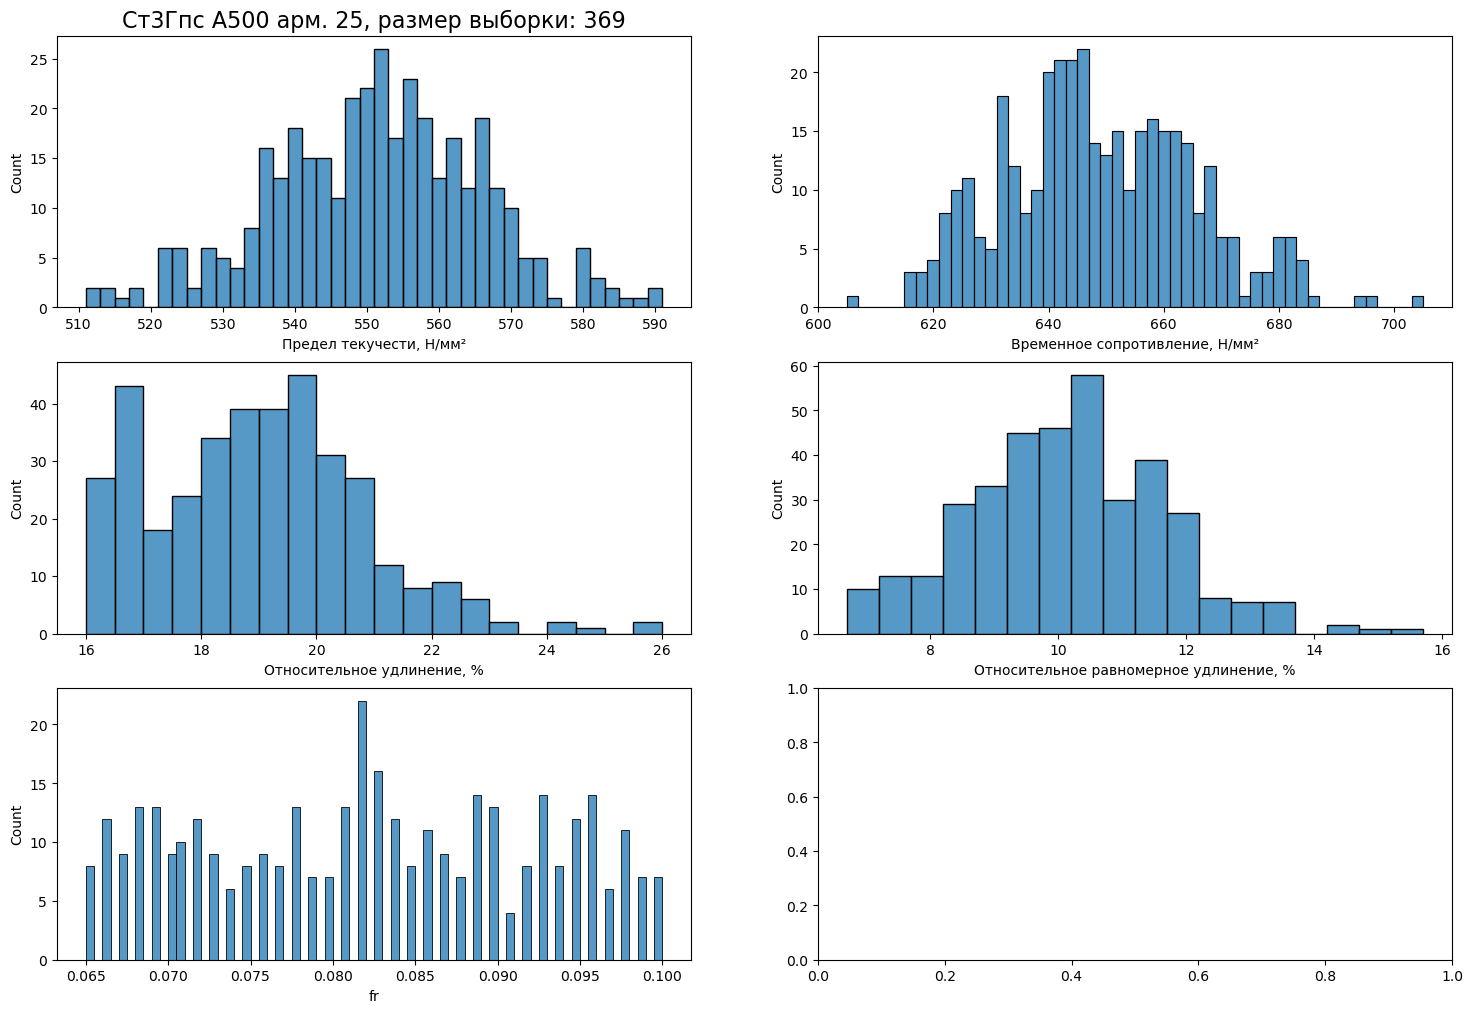

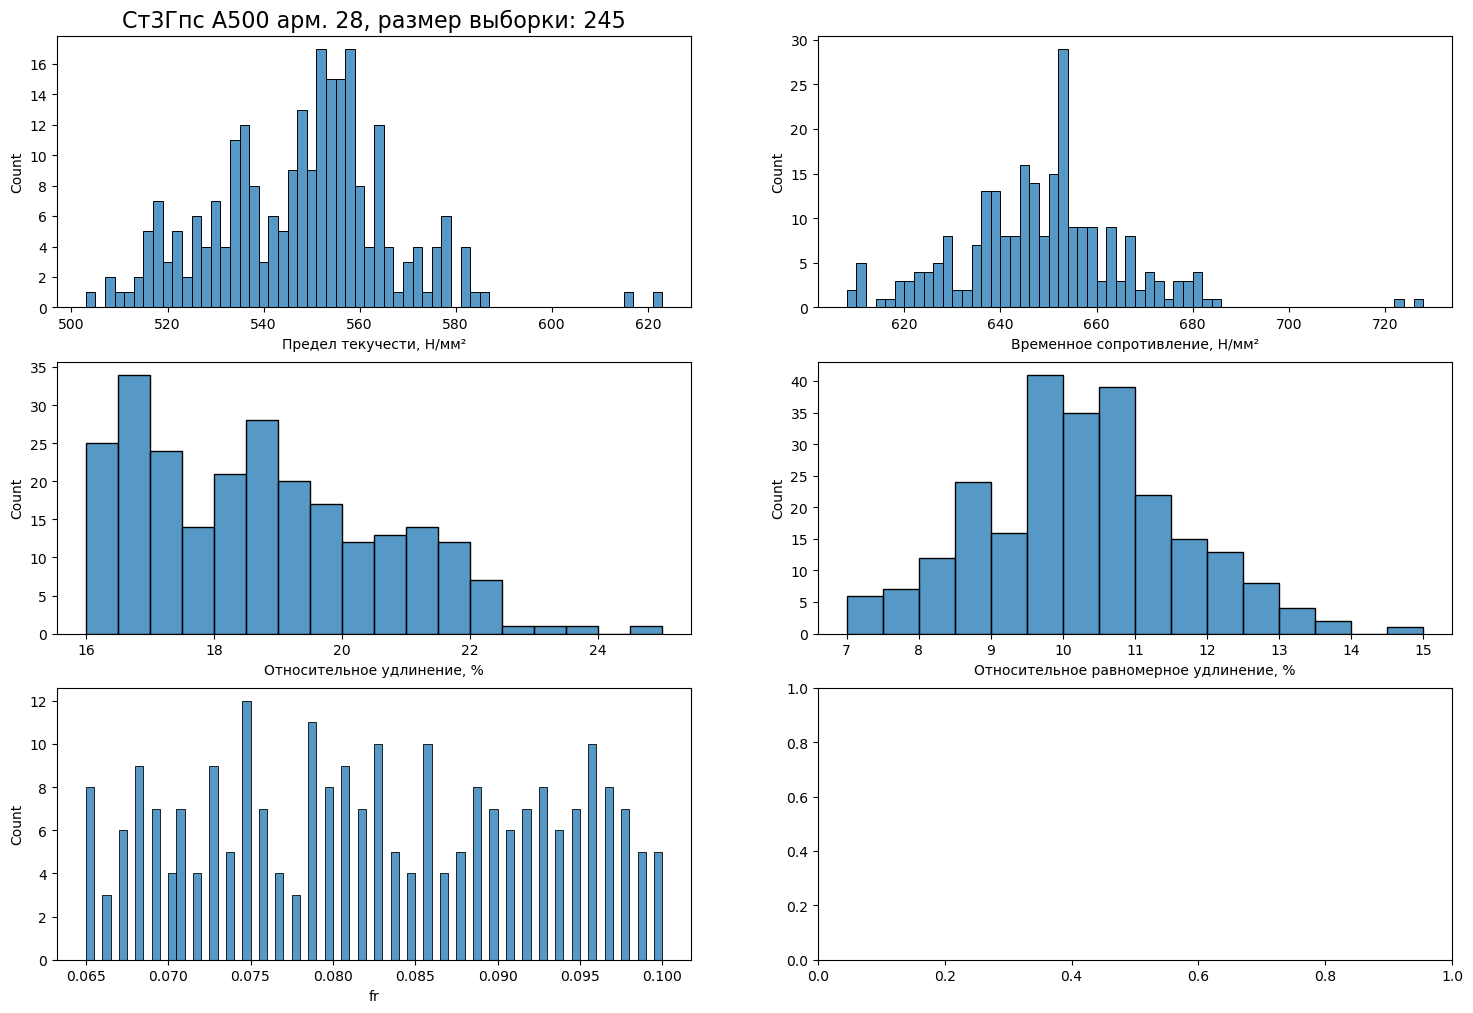

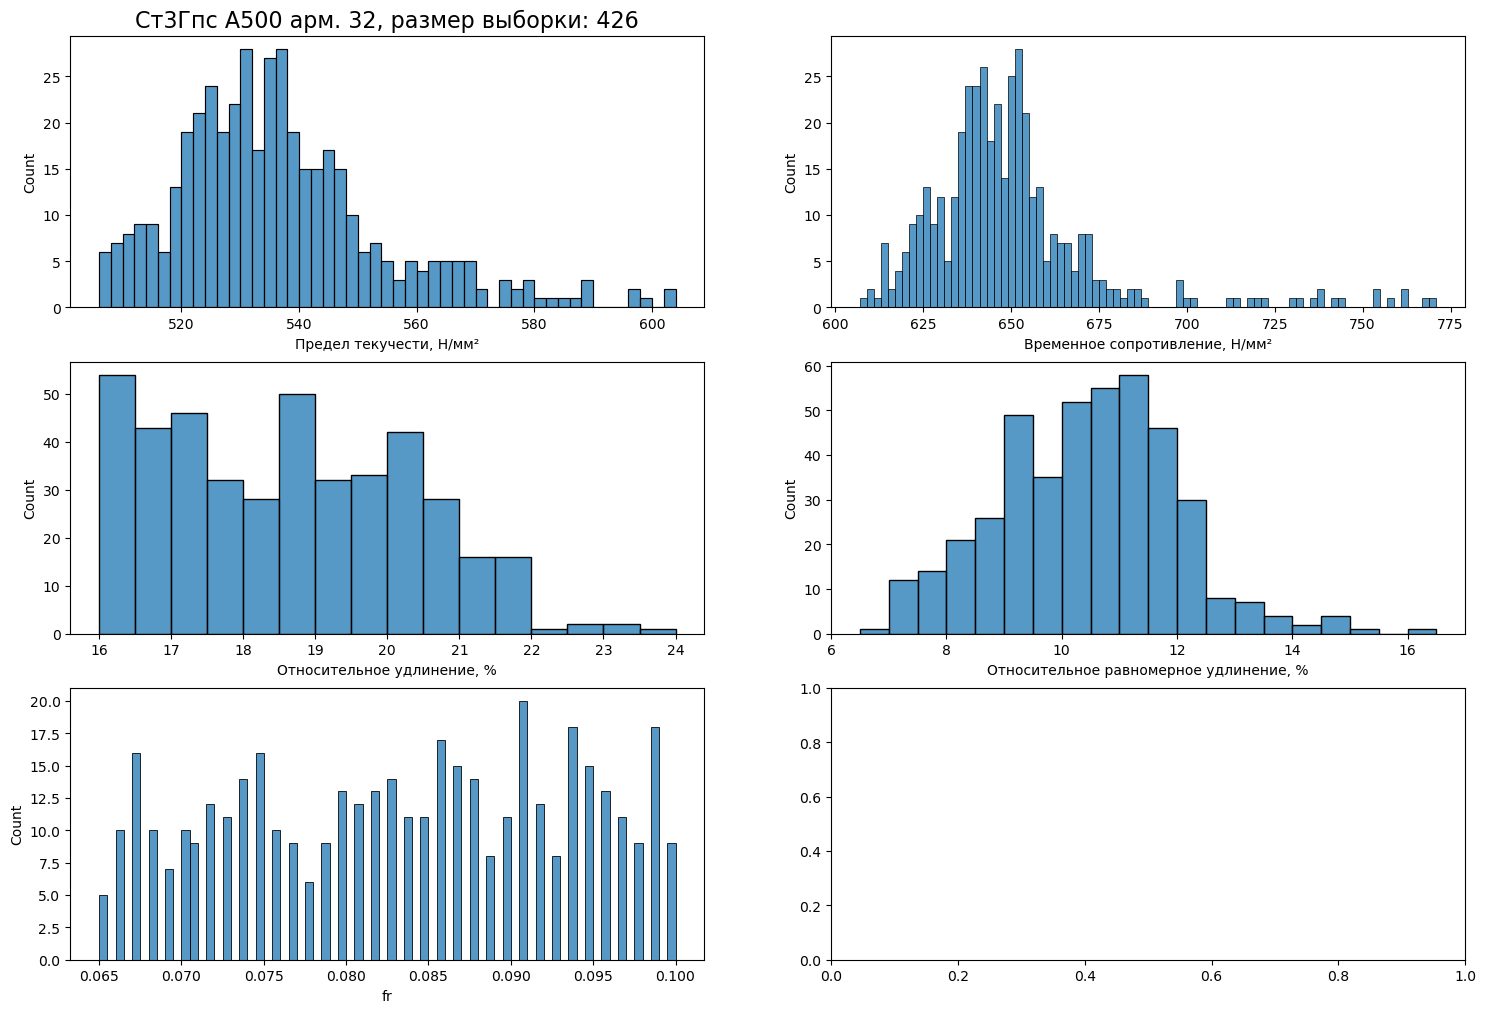

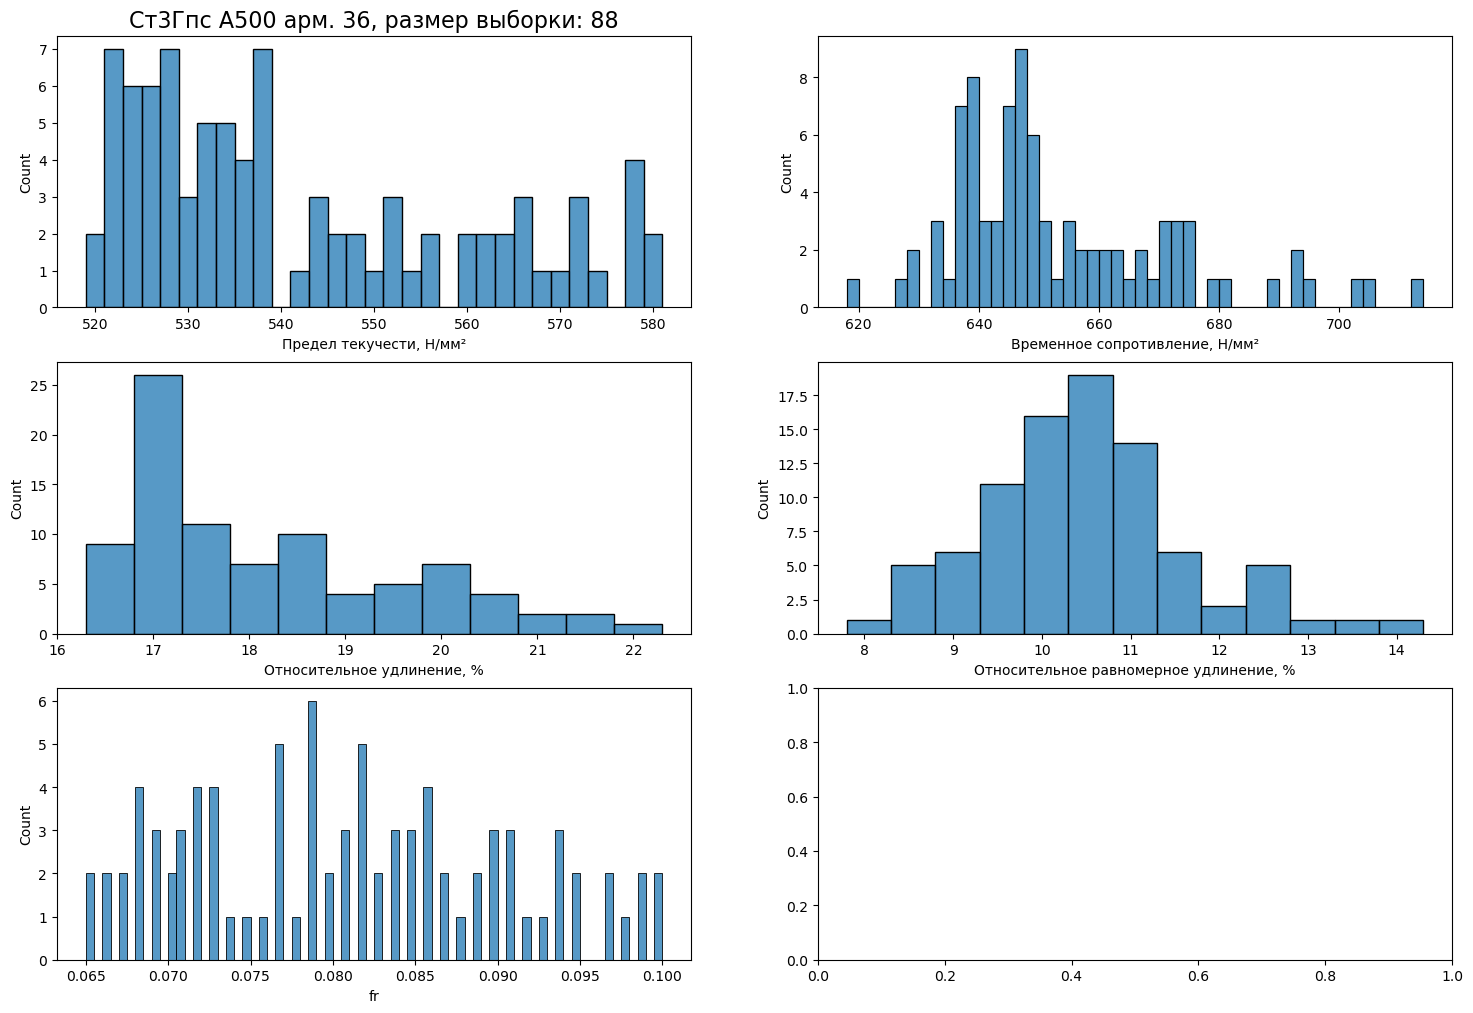

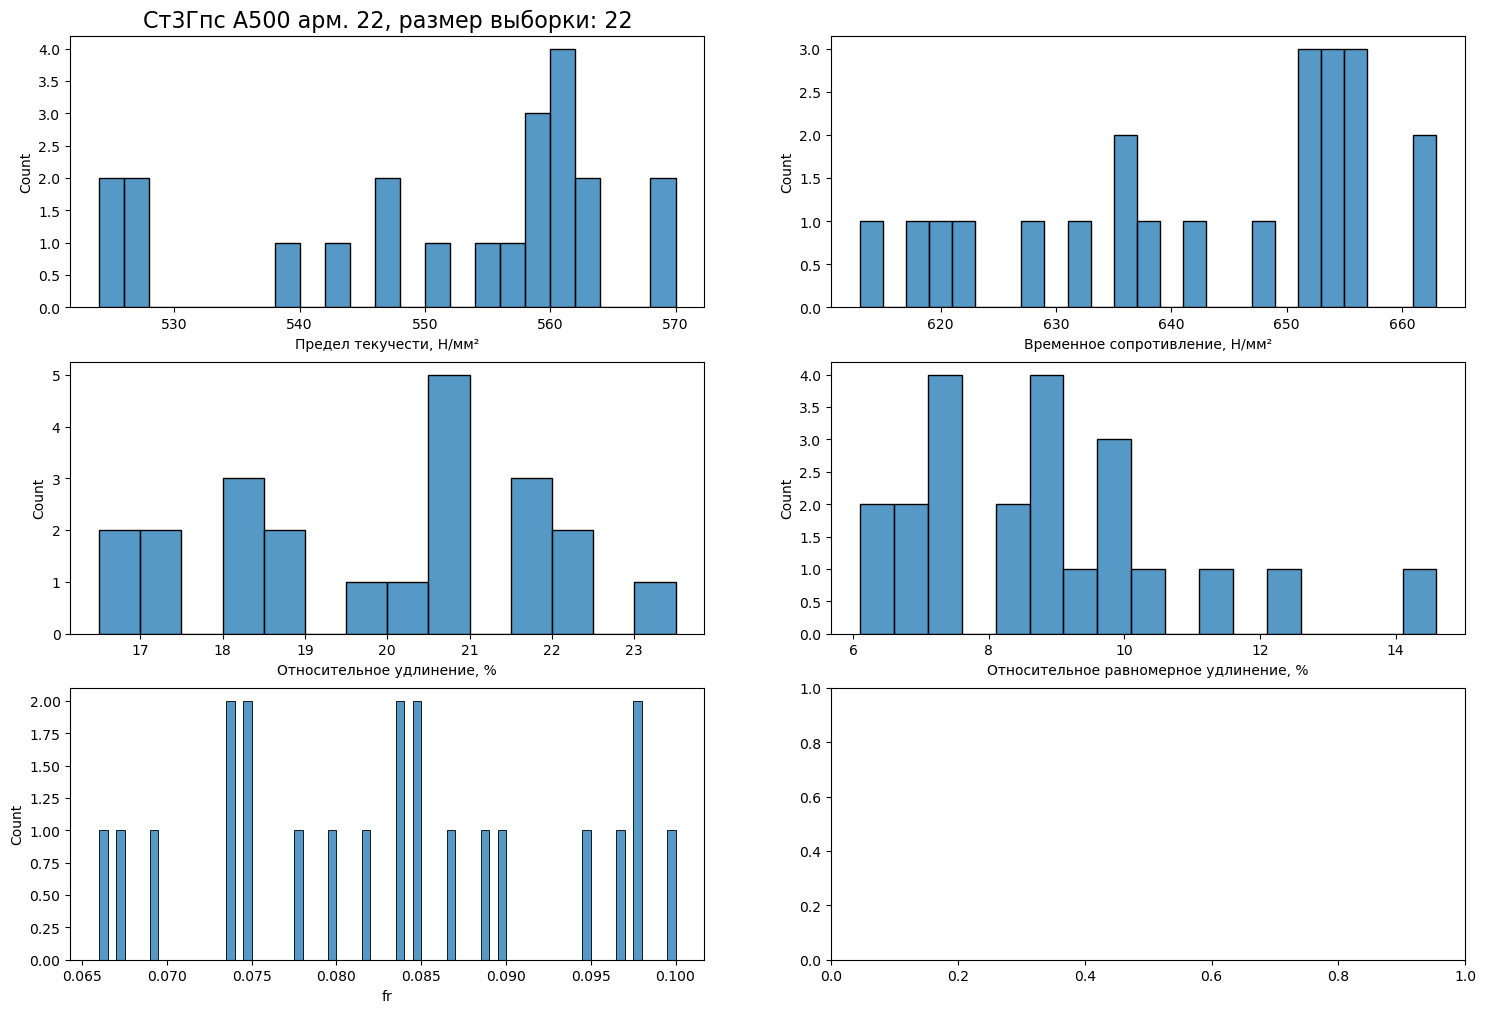

In [7]:
k=0
ROWS = 3
COLUMNS = 2
figures = []

for i in range(len(steelgrade)):
    steelsize = data.xs(steelgrade[i]).index.drop_duplicates().tolist()
    for j in range(len(steelsize)):
        df = data.xs((steelgrade[i], steelsize[j]))
        l = len(df['Предел текучести, Н/мм²'])
        if l > 8:
            figure = plt.figure(figsize=(18, 12))
            axes = figure.subplots(ROWS, COLUMNS)
            plt.subplot(3, 2, 1)
            plt.title(steelgrade[i]+" "+ steelsize[j]+", размер выборки: "+ str(l), fontsize=16)
            sns.histplot(data=df, x="Предел текучести, Н/мм²", binwidth=2)
            
            # тест Шапиро-Уилка
            stats1,p = scipy.stats.shapiro(df['Предел текучести, Н/мм²'])
            if p>0.05:
                ress1 = 'Нормальный'
            else:
                ress1 = 'Не является нормальным'
            # Критерий согласия Пирсона
            statp1, p = scipy.stats.normaltest(df['Предел текучести, Н/мм²'])
            if p>0.05:
                resp1 = 'Нормальный'
            else:
                resp1 = 'Не является нормальным'
            # Критерий согласия Колмогорова-Смирнова
            statk1, p = scipy.stats.kstest(df['Предел текучести, Н/мм²'], 'norm')
            if p>0.05:
                resk1 = 'Нормальный'
            else:
                resk1 = 'Не является нормальным '
                
            plt.subplot(3, 2, 2)
            sns.histplot(data=df, x="Временное сопротивление, Н/мм²", binwidth=2)
            
            # тест Шапиро-Уилка
            stats2,p = scipy.stats.shapiro(df['Временное сопротивление, Н/мм²'])
            if p>0.05:
                ress2 = 'Нормальный'
            else:
                ress2 = 'Не является нормальным'
            # Критерий согласия Пирсона
            statp2, p = scipy.stats.normaltest(df['Временное сопротивление, Н/мм²'])
            if p>0.05:
                resp2 = 'Нормальный'
            else:
                resp2 = 'Не является нормальным'
            # Критерий согласия Колмогорова-Смирнова
            statk2, p = scipy.stats.kstest(df['Временное сопротивление, Н/мм²'], 'norm')
            if p>0.05:
                resk2 = 'Нормальный'
            else:
                resk2 = 'Не является нормальным '
            plt.subplot(3, 2, 3)
            sns.histplot(data=df, x="Относительное удлинение, %", binwidth=0.5)
            
            # тест Шапиро-Уилка
            stats3,p = scipy.stats.shapiro(df['Относительное удлинение, %'])
            if p>0.05:
                ress3 = 'Нормальный'
            else:
                ress3 = 'Не является нормальным'
            # Критерий согласия Пирсона
            statp3, p = scipy.stats.normaltest(df['Относительное удлинение, %'])
            if p>0.05:
                resp3 = 'Нормальный'
            else:
                resp3 = 'Не является нормальным'
            # Критерий согласия Колмогорова-Смирнова
            statk3, p = scipy.stats.kstest(df['Относительное удлинение, %'], 'norm')
            if p>0.05:
                resk3 = 'Нормальный'
            else:
                resk3 = 'Не является нормальным '
            plt.subplot(3, 2, 4)
            sns.histplot(data=df, x="Относительное равномерное удлинение, %", binwidth=0.5)
            
            # тест Шапиро-Уилка
            stats4,p = scipy.stats.shapiro(df['Относительное равномерное удлинение, %'])
            if p>0.05:
                ress4 = 'Нормальный'
            else:
                ress4 = 'Не является нормальным'
            # Критерий согласия Пирсона
            statp4, p = scipy.stats.normaltest(df['Относительное равномерное удлинение, %'])
            if p>0.05:
                resp4 = 'Нормальный'
            else:
                resp4 = 'Не является нормальным'
            # Критерий согласия Колмогорова-Смирнова
            statk4, p = scipy.stats.kstest(df['Относительное равномерное удлинение, %'], 'norm')
            if p>0.05:
                resk4 = 'Нормальный'
            else:
                resk4 = 'Не является нормальным '
            plt.subplot(3, 2, 5)
            sns.histplot(data=df, x="fr", binwidth=0.0005)
            
            # тест Шапиро-Уилка
            stats5,p = scipy.stats.shapiro(df['fr'])
            if p>0.05:
                ress5 = 'Нормальный'
            else:
                ress5 = 'Не является нормальным'
            # Критерий согласия Пирсона
            statp5, p = scipy.stats.normaltest(df['fr'])
            if p>0.05:
                resp5 = 'Нормальный'
            else:
                resp5 = 'Не является нормальным'
            # Критерий согласия Колмогорова-Смирнова
            statk5, p = scipy.stats.kstest(df['fr'], 'norm')
            if p>0.05:
                resk5 = 'Нормальный'
            else:
                resk5 = 'Не является нормальным '
        
            
            
            figures.append(figure)
            dpi = figure.get_dpi()
            figureSize = figure.get_size_inches()
            image = BytesIO()
            figure.savefig(image, format="png")
            image.seek(0)
            image = ImageReader(image)
            figureSize = figure.get_size_inches()*1
            height = indent
            c.drawImage(image, (10.5-figureSize[0]/2)*cm, (29.7-figureSize[1]-height)*cm, figureSize[0]*cm, figureSize[1]*cm)
            height += figureSize[1]
            if l<25:
                c.setFont('NotoSans', 8)
                c.drawString(xc, (29.7-height)*cm,"Предупреждение: объём выборок менее 25 значений, что может привести к некорректным результатам оценки")
                height += indent
            tt = [['Характеристика','Характер распределения по критерию Пирсона', 'Характер распределения по критерию Колмогорова-Смирнова', 'Характер распределения по критерию Шапиро-Уилка' ],
                               ['Предел текучести', resp1, resk1, ress1],
                              ['Временное сопротивление', resp2, resk2, ress2],
                              ['Относительное удлинение', resp3, resk3, ress3],
                              ['Относительное равномерное удлинение', resp4, resk4, ress4],
                              ['fr', resp5, resk5, ress5]]
            t=Table(tt)
            t.setStyle(TableStyle([('INNERGRID', (0,0), (-1,-1), 0.25, colors.black),
            ('BOX', (0,0), (-1,-1), 0.25, colors.black), ('FACE', (0,0), (-1,-1),'NotoSans'),
            ('SIZE', (0,0), (-1,-1), 4)]))
            t.wrapOn(c, 210, 297)
            t.drawOn(c, 2.5*cm, (29.7-1.25*height)*cm)
            c.showPage()
                
        else:
            height = indent
            c.setFont('NotoSans', 8)
            c.drawString(xc, (29.7-height)*cm,"Предупреждение: "+ steelgrade[i]+" "+ steelsize[j]+", размер выборки: "+str(l)+", из-за чего невозможно провести статистический анализ")
            c.showPage()
# Сохраняем.
c.save()